In [32]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
 #Install hvplot 
 # !pip install hvplot

In [15]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [16]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [48]:
from IPython.display import display
# Plot your data to see what's in your DataFrame
market_data_plot= df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)
display(market_data_plot)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

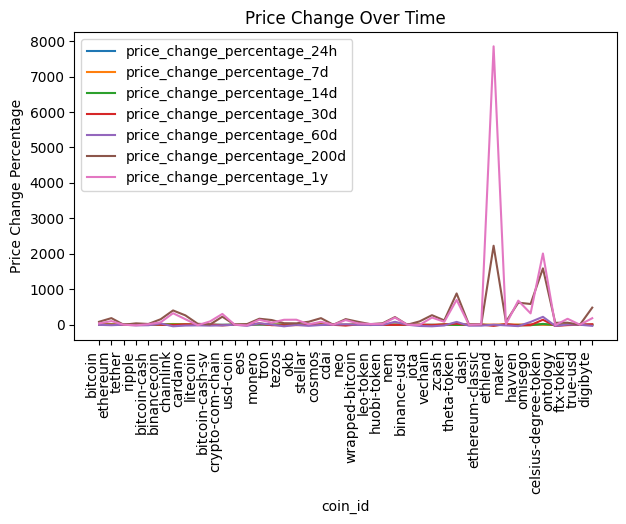

In [64]:
# show line plot by using pandas

# Create the line plot using pandas plot
market_data_plot = df_market_data.plot(
    kind='line',
    figsize=(7, 4),
    title='Price Change Over Time',
)

# Set plot labels
market_data_plot.set_xlabel('coin_id')
market_data_plot.set_ylabel('Price Change Percentage')

# Setups
x_ticks = range(len(df_market_data))
x_labels = df_market_data.index.tolist()
plt.xticks(x_ticks, x_labels, rotation=90, ha='right')

# Display the line plot
market_data_plot.figure.show()


---

### Prepare the Data

In [18]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])

#Display the scaled data
market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [19]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled, columns= ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display sample data
df_market_data_scaled.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
ethereum-classic,-0.071312,-0.229484,-0.175544,0.051882,-0.551760,-0.526060,-0.273062
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
nem,-0.217984,-0.849381,0.297632,-0.199820,1.773127,-0.047361,-0.119226
tron,0.130050,-0.041018,0.147155,-0.543776,0.120116,-0.241118,-0.234014
bitcoin-cash-sv,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488
cosmos,-0.255978,1.840274,0.643565,0.116538,-0.151913,-0.117565,-0.215191


---

### Find the Best Value for k Using the Original Data.

In [20]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [21]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters = i, random_state = 1)
# 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [115]:
# Using hvplot  a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_hvplot = df_elbow.hvplot.line(x = "k", y = "inertia",
    width=600,
    height=400,
    rot=90,
    title="Elbow Curve",
    xticks=k
)
elbow_hvplot

:Curve   [k]   (inertia)

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

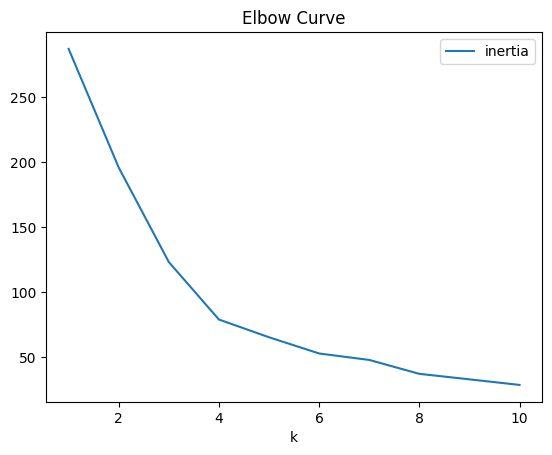

In [116]:
#show line plot using Pandas
elbow_plot = df_elbow.plot("k", "inertia", title="Elbow Curve")
elbow_plot

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [24]:
# Initialize the K-Means model using the best value for k
model_k4 = KMeans(n_clusters= 4, random_state= 1)

In [25]:
# Fit the K-Means model using the scaled data
model_k4.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_pred = model_k4.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
market_pred

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1],
      dtype=int32)

In [28]:
# Create a copy of the DataFrame
df_market_data_predict = df_market_data_scaled.copy()

In [30]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predict["prediction"] = market_pred

# Display sample data
df_market_data_predict.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,prediction
coin_id,,,,,,,,
dash,-0.296940,0.094763,0.040040,-0.358830,-0.558527,-0.535732,-0.284071,1
stellar,-0.277543,-0.385209,-0.153243,-0.371816,-0.656403,-0.353387,-0.270874,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
zcash,-0.127467,0.929119,0.677532,0.223834,-0.437068,-0.265163,-0.214829,3
iota,0.259097,0.249508,-0.478953,-0.218997,-0.735815,-0.329179,-0.285310,1
nem,-0.217984,-0.849381,0.297632,-0.199820,1.773127,-0.047361,-0.119226,1
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232,1
wrapped-bitcoin,0.515453,0.461843,0.769975,0.224045,-0.074674,-0.355054,-0.251623,3
vechain,0.585089,-0.994231,-2.217108,-0.603898,-0.930423,0.077149,-0.117482,1


In [41]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_hvplot = df_market_data_predict.hvplot.scatter(x="price_change_percentage_24h",
                                                    y="price_change_percentage_7d",
                                                    c=df_market_data_predict["prediction"],
                                                    title= "Price Change 24h vs. 7d (k=4)"
)
market_hvplot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,_color)

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

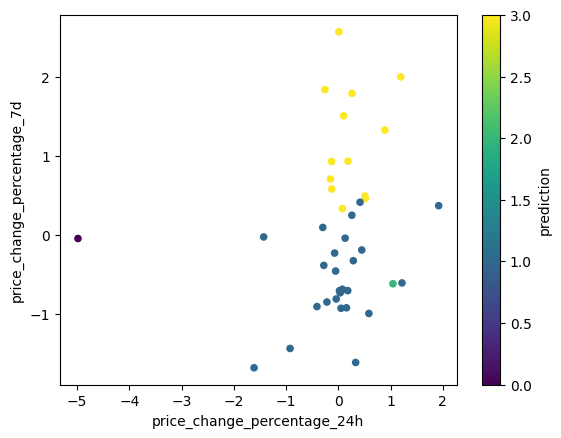

In [46]:
#show scatter plot by using pandas
df_market_data_predict.plot.scatter("price_change_percentage_24h",
                                    "price_change_percentage_7d",
                                    c= "prediction",
                                    colormap = 'viridis'
                                    )


---

### Optimize Clusters with Principal Component Analysis.

In [69]:
# Create a PCA model instance and set `n_components=3`.
pca= PCA(n_components=3)

In [70]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame.
market_data_pca[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [71]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [72]:
# Sum of 3 principal components
pca.explained_variance_ratio_.sum()

0.895031657030984

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**The total variance is 89.5%.

In [76]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(market_data_pca, columns = ["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
df_market_data_pca["coin_id"] = df_market_data_scaled.index

# Set the coinid column as index
df_market_data_pca.set_index("coin_id", inplace = True)
# Display sample data
df_market_data_pca.sample(10)

,PC1,PC2,PC3
coin_id,,,
crypto-com-chain,-0.248198,-1.376252,-1.462026
neo,-0.362120,-0.986914,-0.728752
maker,-0.389045,0.165041,0.379414
ethlend,8.089018,-3.896891,2.301382
digibyte,-0.297910,-0.191126,-0.909602
theta-token,2.676868,-0.013954,-1.965207
cdai,-0.513528,-0.142802,-0.656566
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [78]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1,11))

In [79]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
  k_model_pca = KMeans(n_clusters= i, random_state = 2)
  k_model_pca.fit(df_market_data_pca)
  inertia_pca.append(k_model_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [83]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k_pca": k_pca,
                  "inertia_pca" : inertia_pca
                  }
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca.head()

,k_pca,inertia_pca
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.072792


In [113]:
# Using hvplot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_pca_hvplot = df_elbow_pca.hvplot.line(x = 'k_pca', y = 'inertia_pca',
    width=600,
    height=400,
    rot=90,
    title="Elbow PCA Curve",
    xticks=k
)
elbow_pca_hvplot

:Curve   [k_pca]   (inertia_pca)

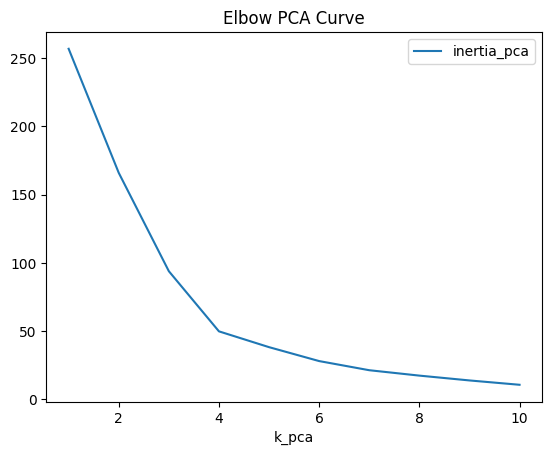

In [105]:

elbow_pca_plot = df_elbow_pca.plot("k_pca", "inertia_pca",title="Elbow PCA Curve")

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k=4'.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Same with the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [87]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state =2)

In [88]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_market_data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [90]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_pred = model_pca.predict(df_market_data_pca)
# Print the resulting array of cluster values.
pca_pred

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [94]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_pred =  df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_pred["hover_cols"] = pca_pred

# Display sample data
df_market_pca_pred.sample(10)

,PC1,PC2,PC3,hover_cols
coin_id,,,,
binance-usd,-0.450211,-0.151019,-0.647401,0
bitcoin-cash-sv,-0.759014,-0.201200,-0.217653,0
maker,-0.389045,0.165041,0.379414,2
huobi-token,-0.407483,-0.212507,-0.351426,0
digibyte,-0.297910,-0.191126,-0.909602,0
ethereum-classic,-0.579924,-0.356334,-0.114942,0
ftx-token,-0.593142,0.021485,0.209911,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
ripple,-0.471835,-0.222660,-0.479053,0


In [95]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_pca_hvplot = df_market_pca_pred.hvplot.scatter(x = "PC1",
                                                   y = "PC2",
                                                   by= "hover_cols",
                                                  )
market_pca_hvplot

:NdOverlay   [hover_cols]
   :Scatter   [PC1]   (PC2)

<Axes: xlabel='PC1', ylabel='PC2'>

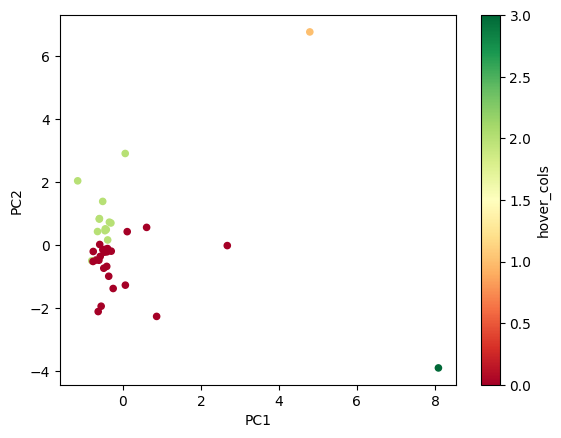

In [102]:
# Create a scatter plot using Pandas
df_market_pca_pred.plot.scatter("PC1", "PC2", c= "hover_cols", cmap= "RdYlGn")

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [120]:
# Composite plot to contrast the Elbow curves
elbow_compsite = elbow_hvplot + elbow_pca_hvplot
elbow_compsite

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k_pca]   (inertia_pca)

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
clusters_compsite = market_hvplot + market_pca_hvplot
clusters_compsite

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Firtstly, using less amount of features will cause the reduction of dimensionality implies a reduction in the variance of the clustered data, which will reduces the amount of inertia.
  Secoundly, based on the above plots that the original clusters and the pca clusters has no difference, which means using fewer features will benefit us, especailly when we are tring to analysis a large amounts of resources data, without compromising optimal results.



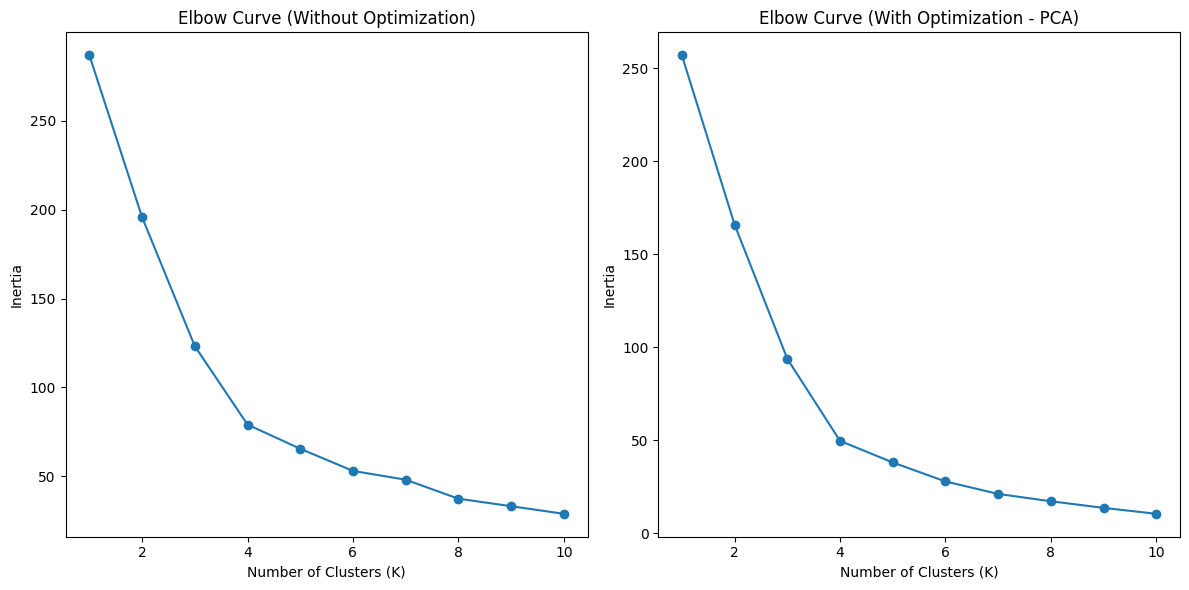

In [119]:
# Create a composite plot using matplotlib.pyplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Elbow curve without optimization
ax1.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
ax1.set_title('Elbow Curve (Without Optimization)')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia')

# Plot the Elbow curve with optimization (PCA)
ax2.plot(df_elbow_pca['k_pca'], df_elbow_pca['inertia_pca'], marker='o')
ax2.set_title('Elbow Curve (With Optimization - PCA)')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Inertia')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
